# Introducción

Los datos sobre nacimiento provienen de las estadísticas realizadas por el INEC, en el cual se refleja la frecuencia e intensidad en que ocurren los nacimientos en el país durante el año del 2018. Por otra parte, es posible conocer los perfiles de los niños, así como los datos propios del nacimiento. 

Las variables que son proporcionadas nos permiten, crear indicadores como lo son la tasa global de fecundidad, la tasa bruta de natalidad, así como realizar las estimaciones de población. 

Por tanto, se buscó predecir cual es el peso y la altura con la cual nace un bebe, basándose en las características que se arrojaron en las estadísticas. 

Cabe señalar, que los datos ingresado en el 2017, son los que se presentan en nuestro grupo de datos llamado “Nacimientos 2018”, pues busca tener los datos año con año, ya que para el 2017 existió un rezago con las estadísticas y se había utilizado los datos de los últimos 10 años.

Según la bibliotéca Nacional de Medicina de los EE.UU, que cuando un bebé es pequeño se le va a considerar que pesa menos de 2.5 kg (5.5 libras) y un bebé grande al de más de 4 kg (8.8 libras).

Determinar el peso de un bebé previo a nacer nos podria indicar un escenario previo al cual prepararnos, por ejemplo cuando un bebé nace bajo peso puede indicar que es demasiado pequeño, que nació antes de tiempo (prematuro) o ambas cosas. Esto puede deberse a muchas causas; como problemas de salud de la mamá, factores genéticos, problemas con la placenta o que la madre haya usado drogas durante el embarazo.

    "Algunos bebés de bajo peso pueden estar a riesgo de algunos problemas de salud. Unos pueden enfermarse o desarrollar infecciones en los primeros días de vida. Otros pueden sufrir problemas a largo plazo como retraso en el desarrollo motriz o social o problemas de aprendizaje. 

    A su vez, los bebés que nacieron con demasiado peso son grandes quizás porque sus padres lo son o porque la madre tuvo diabetes durante el embarazo. Estos bebés están a un mayor riesgo de lesiones al nacer y problemas con el azúcar en la sangre" (Biblioteca nacional de mediciona de los EE.UU)

# Objetivo

## A. Objetivo General
1. Predecir cual es el peso y la altura con la cual nace un bebe.

## B. Objetivo Especifico
1. Eliminar las variables inecesarias la tabla de datos.
2. Explorar los datos.
3. Establecer dos grupos datos los cuales uno es de entrenamiento y otro para pruebas.
4. Determinar los valeres de peso y altura por medio de un algoritmo de predicción multi-etiqueta

# Descripción de los datos 

El **titulo** que recibe esta tabla de datos es, "Costa Rica: Total Nacimientos 2017 - 2018, Nacimientos ocurridos e inscritos en el periodo 2017 - 2018", sin embargo se establece un **subtitulo** denominado, "Nacimientos ocurridos e inscritos en el periodo 2018"

Estas tablas de datos del INEC, en Costa Rica esta a cargo de la Unidad de Estadísticas Demográficas (UED) que pertenece al Área de Censos y Encuestas del Instituto Nacional de Estadística y Censos.

Dado que lo documentado es una estadística basada en registros administrativos es importante generar una estrategia de cuación para asi tener mejores indicadores de calidad, en los siguientes dos parrafos se mencionan algunas actividades que se llevan:

- Se realizan cruces de variables importantes que identifiquen alguna relación que, aunque esté dentro de los rangos permitidos, el dato ya cruzado con otra variable pueda arrojar inconsistencias.

- Durante el proceso de digitación el SISEVI se enlaza con la información del Tribunal Supremo de Elecciones por medio del número de cédula de la madre, y en su caso del padre, por lo que las variables: nombre de la madre, o del padre, edad, sexo y estado civil se cargan automáticamen

Estos datos son recuperados en el mes de agosto del 2020, los cuales se encuentran en la pagina del [INEC](https://www.inec.go.cr/) bajo el nombre [Total Nacimientos 2017 - 2018](http://sistemas.inec.cr/pad5/index.php/catalog/254/get-microdata) en un formato **.sav** los cuales forman parte del Programa Acelerado de Datos INEC / Costa Rica., bajo los derechos reservados (El Instituto Nacional de Estadística y Censos (INEC) es el propietario de los derechos de la información metodológica y de las bases de datos aquí documentadas). La fecha de producción es **2020-05-27**

Los archivos de extensión ".sav", son archivos genericos utilizados comunmente para video juegos, no obtante tambien se utilizan para el almacenamiento aunque es poco común ya que en este caso cual corresponde a una extensión genérica de almacenamiento de datos, lo que significa que no están destinados para ser visto por todos.


# Importación de librerias

A continuacion se importan las librerias que se utilizaran a lo largo de nuestro proyecto.

In [1]:
import pandas as pd
import pyreadstat
import sklearn as skl 
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import matplotlib

/home/koki/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


Las siguientes son funciones especificas de la libreria `scikit learn`

In [2]:
from sklearn.neighbors import KNeighborsClassifier      
from sklearn.multioutput import MultiOutputRegressor    
from sklearn.model_selection import train_test_split    
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestClassifier     
from sklearn.tree import DecisionTreeClassifier     
from sklearn.multioutput import MultiOutputClassifier

# Cargar Datos

Se importará una tabla de datos en formato `.sav`

In [3]:
df = pd.read_spss("nacimientos.sav")

# Exploración de los datos

Luego de realizar la exploración de los daroa sin tratar, se pretende tomar las variable relevantes que determinen el proceso que conlleva el resultado de peso y tamaño de un bebé, haciendo principal enfasis en la madre, puesto que en ella es donde radica el mayor tiempo de gestación 

In [4]:
df.shape

(68449, 52)

Observaremos los nombres de las variables

In [5]:
df.columns

Index(['Anotrab', 'Mestrab', 'Nacio', 'Sexo', 'Peso', 'pesorec', 'Estatura',
       'estrec', 'Provocu', 'Pcocu', 'Pcdocu', 'Instnac', 'Dianac', 'Mesnac',
       'Anonac', 'Leyp', 'Edadpad', 'edpadrec', 'Paispad', 'Nacpad',
       'grocupad', 'Nivedpad', 'Hijtepad', 'Escivpad', 'Edadmad', 'edmadrec',
       'Paismad', 'Nacmad', 'grocumad', 'Nivedmad', 'Escivmad', 'Provincia',
       'Pc', 'Pcd', 'IU', 'Reginec', 'Regsalud', 'Paratend', 'Mesesemb',
       'Hijosten', 'Abortos', 'Totconsul', 'Medcons', 'Declara', 'Provregis',
       'Pcregis', 'Pcdregis', 'Diadeclara', 'Mesdeclara', 'Anodeclara',
       'Filiacion', 'Inscen'],
      dtype='object')

Luego de tener los nombres de las variables es importante saber el tipo de dato al que nos estamos enfrentando

In [6]:
df.dtypes

Anotrab       category
Mestrab       category
Nacio         category
Sexo          category
Peso          category
pesorec       category
Estatura      category
estrec        category
Provocu       category
Pcocu         category
Pcdocu        category
Instnac       category
Dianac        category
Mesnac        category
Anonac        category
Leyp          category
Edadpad       category
edpadrec      category
Paispad       category
Nacpad        category
grocupad      category
Nivedpad      category
Hijtepad      category
Escivpad      category
Edadmad       category
edmadrec      category
Paismad       category
Nacmad        category
grocumad      category
Nivedmad      category
Escivmad      category
Provincia     category
Pc            category
Pcd           category
IU            category
Reginec       category
Regsalud      category
Paratend      category
Mesesemb      category
Hijosten      category
Abortos       category
Totconsul     category
Medcons       category
Declara    

Hagamos un breve resúmen de los datos

In [7]:
df.info

<bound method DataFrame.info of       Anotrab    Mestrab   Nacio    Sexo      Peso       pesorec  Estatura  \
0      2018.0      Marzo    Solo  Hombre       300  Menos de 500        25   
1      2018.0      Julio    Solo  Hombre       350  Menos de 500        26   
2      2018.0    Octubre    Solo   Mujer       360  Menos de 500        24   
3      2018.0      Abril    Solo   Mujer       380  Menos de 500        27   
4      2018.0      Abril    Solo   Mujer       410  Menos de 500        25   
...       ...        ...     ...     ...       ...           ...       ...   
68444  2018.0  Diciembre    Solo  Hombre  Ignorado      Ignorado  Ignorado   
68445  2018.0  Diciembre  Gemelo  Hombre  Ignorado      Ignorado  Ignorado   
68446  2018.0  Diciembre  Gemelo  Hombre  Ignorado      Ignorado  Ignorado   
68447  2018.0  Diciembre    Solo   Mujer  Ignorado      Ignorado  Ignorado   
68448  2018.0  Diciembre    Solo  Hombre  Ignorado      Ignorado  Ignorado   

         estrec     Provocu    

Por último vamos a dar un vistaso a los datos

In [8]:
df.head()

,Anotrab,Mestrab,Nacio,Sexo,Peso,pesorec,Estatura,estrec,Provocu,Pcocu,...,Medcons,Declara,Provregis,Pcregis,Pcdregis,Diadeclara,Mesdeclara,Anodeclara,Filiacion,Inscen
0,2018.0,Marzo,Solo,Hombre,300,Menos de 500,25,25 - 34,Puntarenas,601 - Puntarenas,...,3,Madre,Puntarenas,601 - Puntarenas,60115- El Roble,13.0,Marzo,2018.0,Fuera de unión,En institución hospitalaria
1,2018.0,Julio,Solo,Hombre,350,Menos de 500,26,25 - 34,Alajuela,201 - Alajuela,...,0,Madre,Alajuela,201 - Alajuela,20101- Alajuela,18.0,Julio,2018.0,Fuera de unión,En institución hospitalaria
2,2018.0,Octubre,Solo,Mujer,360,Menos de 500,24,15 - 24,Puntarenas,601 - Puntarenas,...,2,Madre,Puntarenas,601 - Puntarenas,60115- El Roble,5.0,Octubre,2018.0,Dentro de unión,En institución hospitalaria
3,2018.0,Abril,Solo,Mujer,380,Menos de 500,27,25 - 34,San José,101 - San José,...,4,Padre,San José,101 - San José,10103- Hospital,25.0,Abril,2018.0,Dentro de unión,En institución hospitalaria
4,2018.0,Abril,Solo,Mujer,410,Menos de 500,25,25 - 34,San José,101 - San José,...,5,Padre,San José,101 - San José,10103- Hospital,6.0,Abril,2018.0,Dentro de unión,En institución hospitalaria


# Preparación de los datos
Se utilizará el comando `df[df != "Ignorado"]`, para eliminar los atributos llamados `Ignorado` o `Ignorada` que corresponden a un dato nulo.

In [9]:
df = df[df != "Ignorado"]
df = df[df != "Ignorada"]
df = df.dropna()

Vamos asignar nuestras variables independientes (`datos`) y dependientes (`multi_salida, peso,tamaño`).
 
Variables dependientes:
- `estrec` = Estatura al nacer en grupos
- `pesorec`= Peso al nacer en grupos

 
Variables independientes serian:
 - `Nacio`     = Tipo de nacimiento
 - `Sexo`      = Sexo del recien nacido
 - `Leyp`      = Ley de paternidad responsable
 - `grocupad`  = Grupos de ocupación del padre
 - `edmadrec`  = Edad de la madre en grupos
 - `grocumad`  = Grupos de ocupación de la madre
 - `IU`        = Indice de Urbanidad
 - `Mesesemb`  = Meses de embarazo
 - `Hijosten`  = Hijos tenidos por la madre
 - `Abortos`   = Total de Abortos
 - `Medcons`   = Consultas por medico



In [10]:
df = pd.DataFrame(df)
datos = df[['Nacio', 'Sexo','Leyp', 'grocupad', 'edmadrec', 'grocumad', 'IU', 'Mesesemb', 'Hijosten', 'Abortos', 'Medcons']]
peso = df['pesorec']
tamaño = df['estrec']
multi_salida = df[['pesorec', 'estrec']]

## Visualización de la variable dependiente

Al correlacionar la estatura con el peso del bebé al nacer, obtenemos un comportamiento bastante lógico como es el caso de que un bebé de 15-24 cm el cual puede ser categrizado como pequeño tendrá implicaciones en su desarrollo y problemas de salud.

Además podemos suponer que:
- Tamaño normal va de 35cm a 54cm, con un peso que deberia estar en un rango de 1500-2999 gamos
- Tamaño pequeño va de 15cm a 34cm, con un peso que deberia estar en un rango de menos de 500-1499 gamos
- Tamaño grande va de 55 cm y más, con un peso que deberia estar en un rango de 3000-3500 y más gamos

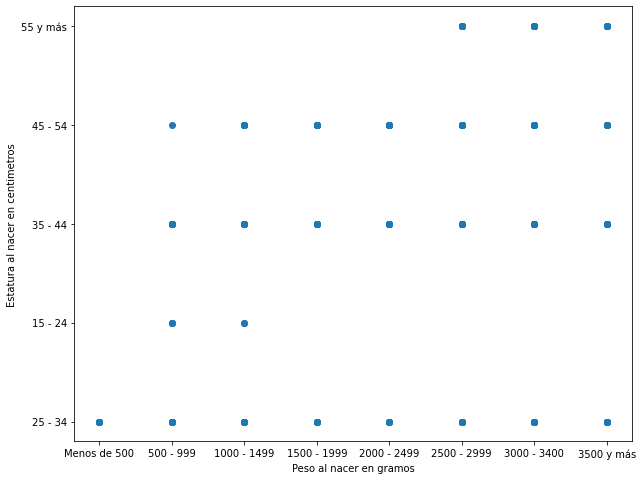

In [11]:
plt.figure(figsize=(10,8))
plt.scatter('pesorec', 'estrec', data=multi_salida)
plt.xlabel('Peso al nacer en gramos')
plt.ylabel('Estatura al nacer en centimetros')
plt.show()

<BarContainer object of 34633 artists>

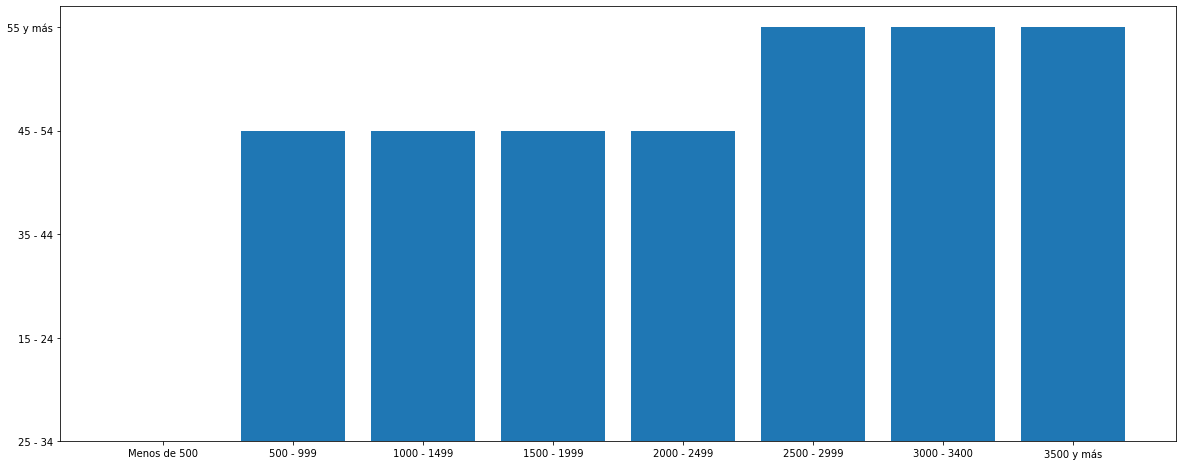

In [12]:
plt.figure(figsize=(20,8))
#plt.subplot(131)
plt.bar(peso, tamaño)

En los siguientes dos histogramas se analizó como están distribuida las variables dependientes. 
En ambos gráficos vemos que los datos no poseen una distribución normal, pues tienden a no estar repartido de forma equitativa, sin embargo, la variable de peso esta más aceptada en sus atributos 

<AxesSubplot:>

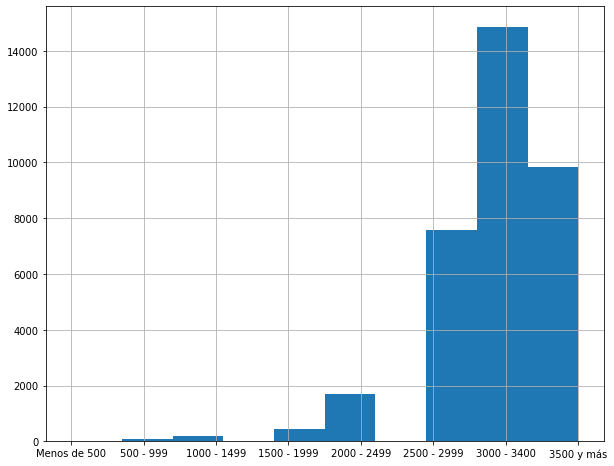

In [13]:
plt.figure(figsize=(10,8))
peso.hist()

<AxesSubplot:>

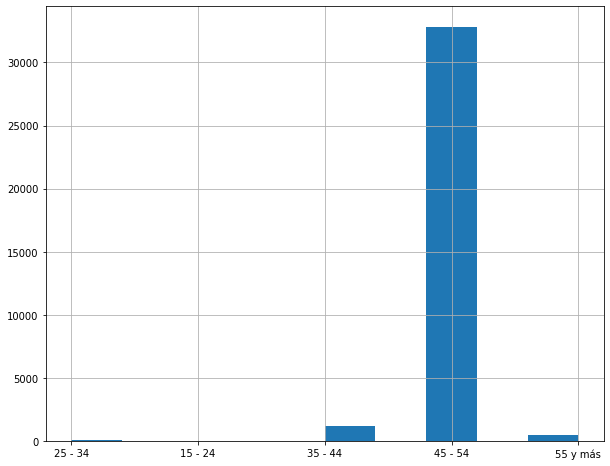

In [14]:
plt.figure(figsize=(10,8))
tamaño.hist()

El gráfico pairplot que se presenta a continuación, está basado en las variables independientes, con este buscamos explorar los mismos

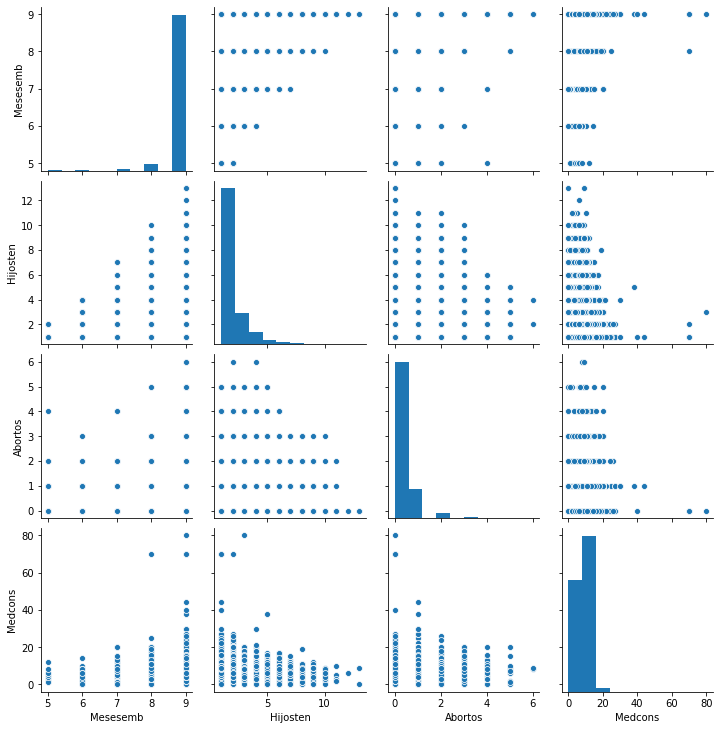

In [15]:
sns.pairplot(datos)

## Transformación a datos dummies
En este segmento se tomarán las variables independientes para ser tranformadas en `dummies`, puesto que tenemos una gran variedad de datos de tipo `caracter` que son necesarios para generar una predicción idónea.

La variable dependiente no se convierte, pues recordemos que esta tiene función de etiquéta de tipo `factor`.

In [16]:
datos = pd.get_dummies(datos, drop_first=True)

## División de los datos

En la división de los datos de entrenamiento (`X_train, y_train`) y de prueba (`X_test, y_test`), se va a utilizar la regla del 80/20, en donde el 80% de los datos será para entrenamientos, elegído de forma elatoria.

### Multi-salida

In [17]:
X_train, X_test, y_train, y_test = train_test_split(datos,multi_salida,test_size = 0.2, random_state=42)

### Peso

In [18]:
X_p_train, X_p_test, Y_p_train, Y_p_test = train_test_split(datos,peso,test_size = 0.2, random_state=42)

### Tamaño

In [19]:
X_t_train, X_t_test, Y_t_train, Y_t_test = train_test_split(datos,tamaño,test_size = 0.2, random_state=42)

# Predicción
La libreria que se trabajará para realizar estas predicciones es la de `scikit learn` con los algoritmos de clasificación: `Regresión` y `Random Forest`
## Predicción de 2 variables
Estos algoritmos son conocidos como `Multilable` y pueden tene 2 o más variables dependientes para generar su predicción
### RandomForest

In [20]:
from sklearn.multioutput import MultiOutputClassifier
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
mgbr = mtf = multi_target_forest.fit(X_train, y_train)
print(mtf.score(X_train, y_train))

0.8195697682812387


### Regresión milti-salida

In [15]:
MultiOutputRegressor(
    GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).score(X_train, y_train)

ValueError: could not convert string to float: '3500 y más'

## Predicción de 1 variable
En este segmento tendremos un algoritmo de clasificación tradicional con una sola variable y utilizaremos los mismos clasificadores para hacer una comparación con los resultados de las predicciones anteriores.

### Peso


## Kneighbots

In [21]:
p_pred_knn = KNeighborsClassifier().fit(X_p_train, Y_p_train)
print(KNeighborsClassifier().fit(X_p_train, Y_p_train).score(X_p_train, Y_p_train))

0.5553670685050169


## Decision Tree

In [22]:
p_pred_dtc = DecisionTreeClassifier().fit(X_p_train, Y_p_train)
print(DecisionTreeClassifier().fit(X_p_train, Y_p_train).score(X_p_train, Y_p_train))

0.8255251570057027


# Algoritmos de predicción uni-salida
## (Tamaño)

## Kneighbots

In [23]:
t_pred_knn = KNeighborsClassifier().fit(X_t_train, Y_t_train)
print(t_pred_knn.score(X_t_train, Y_t_train))

0.950877066339421


## Decision Tree Classifier

In [24]:
t_pred_dtc = DecisionTreeClassifier().fit(X_t_train, Y_t_train)
print(t_pred_dtc.score(X_t_train, Y_t_train))

0.9862484660362376


# Guardar modelos
Para almacenar un modelo de prediccion se utiliza la librería `joblib` con el modelo que nos generara mejor nivel de calificación 

In [25]:
filename = 'Multioutput_model.sav'
joblib.dump(mtf, filename)

['Multioutput_model.sav']

In [26]:
filename = 'altura_model.sav'
joblib.dump(t_pred_dtc, filename)

['altura_model.sav']

In [27]:
filename = 'Peso_model.sav'
joblib.dump(p_pred_dtc, filename)

['Peso_model.sav']

# Cargar Modelos
Cuando cargamos los modelos ya entrenados se busca evitar estar corriendo el codigo constante mente y unicamente se use para realizar predicciones

In [28]:
Multioutput_model = joblib.load('Multioutput_model.sav')
altura_model = joblib.load('altura_model.sav')
peso_model = joblib.load('Peso_model.sav')


# Pruebas
En esta sección, se busca realizar las predicciones con los modelos cargados.

En nuestro caso, las predicciones se harán a los datos de prueba (`X_test`) de la misma forma en que hizo en secciones anteriores. 


In [29]:
datos = df[['Nacio', 'Sexo','Leyp', 'grocupad', 'edmadrec', 'grocumad', 'IU', 'Mesesemb', 'Hijosten', 'Abortos', 'Medcons']]
X_train, X_test, y_train, y_test = train_test_split(datos,multi_salida,test_size = 0.2, random_state=42)
X_p_train, X_p_test, Y_p_train, Y_p_test = train_test_split(datos,peso,test_size = 0.2, random_state=42)
X_t_train, X_t_test, Y_t_train, Y_t_test = train_test_split(datos,tamaño,test_size = 0.2, random_state=42)

## Multi-salida
Se va a declarar una variable llamada `prueba`, con una muestra de tan solo 3 filas de datos de multiple salida

In [30]:
prueba = X_test.sample(n=3, random_state=1)
prueba

,Nacio,Sexo,Leyp,grocupad,edmadrec,grocumad,IU,Mesesemb,Hijosten,Abortos,Medcons
50298,Solo,Hombre,Madre casada o padre presente,Técnicos y profesionales de nivel medio,30 - 34,Profesionales científicas e intelectuales,Urbano,9,3.0,0,7
26478,Solo,Hombre,Madre casada o padre presente,Ocupaciones elementales,30 - 34,"Oficiales, operarias y artesanas de artes mecá...",Urbano,9,2.0,0,6
16734,Solo,Hombre,Padre no declarado,Padre no declarado,20 - 24,Estudiante,Predominantemente rural,9,1.0,0,4


Se va a declarar una variable llamada `prueba_t`, la cual sera nuestra respuesta a la muestra

In [31]:
prueba_t = y_test.sample(n=3, random_state=1)
prueba_t

,pesorec,estrec
50298,3500 y más,45 - 54
26478,3000 - 3400,45 - 54
16734,2500 - 2999,45 - 54


In [32]:
prueba = pd.get_dummies(prueba, drop_first=True)

El resultado se proyectara a continuación

In [33]:
Multioutput_model.predict(prueba)

array([['3000 - 3400', '45 - 54'],
       ['2000 - 2499', '45 - 54'],
       ['3000 - 3400', '45 - 54']], dtype=object)

## Una salida
De igual forma se va a preparar un set de pruebas para las predicciones de una sola variable al igual como se realizó anteriormente.

Para esta prueba la variable se llamada `Prueba_peso` con una muestra de tan solo 3 filas de datos

In [34]:
Prueba_peso = X_p_test.sample(n=3, random_state=1)
Prueba_peso

,Nacio,Sexo,Leyp,grocupad,edmadrec,grocumad,IU,Mesesemb,Hijosten,Abortos,Medcons
50298,Solo,Hombre,Madre casada o padre presente,Técnicos y profesionales de nivel medio,30 - 34,Profesionales científicas e intelectuales,Urbano,9,3.0,0,7
26478,Solo,Hombre,Madre casada o padre presente,Ocupaciones elementales,30 - 34,"Oficiales, operarias y artesanas de artes mecá...",Urbano,9,2.0,0,6
16734,Solo,Hombre,Padre no declarado,Padre no declarado,20 - 24,Estudiante,Predominantemente rural,9,1.0,0,4


In [35]:
prueba_p = Y_p_test.sample(n=3, random_state=1)
prueba_p

50298     3500 y más
26478    3000 - 3400
16734    2500 - 2999
Name: pesorec, dtype: category
Categories (9, object): ['1000 - 1499', '1500 - 1999', '2000 - 2499', '2500 - 2999', ..., '3500 y más', '500 - 999', 'Ignorado', 'Menos de 500']

In [36]:
Prueba_peso = pd.get_dummies(Prueba_peso, drop_first=True)

In [37]:
peso_model.predict(Prueba_peso)

array(['3000 - 3400', '2000 - 2499', '3000 - 3400'], dtype=object)

Para esta prueba la variable se llamada `Prueba_tamano` con una muestra de tan solo 3 filas de datos

In [38]:
Prueba_tamano = X_t_test.sample(n=3, random_state=1)
Prueba_tamano

,Nacio,Sexo,Leyp,grocupad,edmadrec,grocumad,IU,Mesesemb,Hijosten,Abortos,Medcons
50298,Solo,Hombre,Madre casada o padre presente,Técnicos y profesionales de nivel medio,30 - 34,Profesionales científicas e intelectuales,Urbano,9,3.0,0,7
26478,Solo,Hombre,Madre casada o padre presente,Ocupaciones elementales,30 - 34,"Oficiales, operarias y artesanas de artes mecá...",Urbano,9,2.0,0,6
16734,Solo,Hombre,Padre no declarado,Padre no declarado,20 - 24,Estudiante,Predominantemente rural,9,1.0,0,4


In [39]:
Prueba_t = Y_t_test.sample(n=3, random_state=1)
Prueba_t

50298    45 - 54
26478    45 - 54
16734    45 - 54
Name: estrec, dtype: category
Categories (6, object): ['15 - 24', '25 - 34', '35 - 44', '45 - 54', '55 y más', 'Ignorada']

In [40]:
Prueba_tamano = pd.get_dummies(Prueba_tamano, drop_first=True)

In [41]:
altura_model.predict(Prueba_tamano)

array(['45 - 54', '45 - 54', '45 - 54'], dtype=object)

# Conclusiones

La detección temprana de posibles problemas de salud en los niños conlleva a trabajar en el cuidado de la madre, tal como, su estilo de vida, es decir, su entorno, alimentación, descanso entre otros; previo al nacimiento del infant, pues esto podria contribuir a que el niño nazca sano o que se pueda tomar un control del mismo al momento de su nacimiento.

En nuestro proyecto se trabajo unicamente con los datos proporcionador por INEC, en donde se logro predecir el peso y la altura de un bebé basado en rangos, los cuales se categorizaron como un bebé de bajo, normal y alto peso, así también como fue el caso del tamaño: pequeño, normal y grande.

Las pruebas que se realizaron para la demostración fue una muestra que se tomo de forma aleatoria de los datos de prueba dando un resultado positivo, pues la predicción calzaba con el resultado que ya se tenia.

Luego de haber realizado todo este proyecto se llega a intuir la importancia de trabajar con predicción de datos basado en algoritmos de predicción, pues con ellos se puede generar un excelente aporte.


